In [1]:
from functools import reduce
from pyspark.sql.functions import col, lit, when
from graphframes import *

## Preprocess

In [2]:
vertices = sqlContext.read.csv("musae_facebook_target.csv", header=True)

In [3]:
edges_unfiltered = sqlContext.read.csv("musae_facebook_target.csv", header=True)

In [4]:
edges = edges_unfiltered.filter("src != dst")

In [5]:
edges.filter("src == dst").show()

+---+---+
|src|dst|
+---+---+
+---+---+



In [23]:
edges.count()

170823

In [6]:
g = GraphFrame(vertices, edges)

In [7]:
g.vertices.show()

+---+----------------+--------------------+----------+
| id|     facebook_id|           page_name| page_type|
+---+----------------+--------------------+----------+
|  0| 145647315578475|The Voice of Chin...|    tvshow|
|  1|    191483281412|U.S. Consulate Ge...|government|
|  2| 144761358898518|                ESET|   company|
|  3| 568700043198473|Consulate General...|government|
|  4|1408935539376139|Mark Bailey MP - ...|politician|
|  5| 134464673284112| Victor Dominello MP|politician|
|  6| 282657255260177|Jean-Claude Poissant|politician|
|  7| 239338246176789|Deputado Ademir C...|politician|
|  8| 544818128942324|T.C. Mezar-ı Şeri...|government|
|  9|    285155655705|Army ROTC Fightin...|government|
| 10| 295294787190810| NASA Student Launch|government|
| 11| 837707072929819|       Eliziane Gama|politician|
| 12|    189778427932|     Socialstyrelsen|government|
| 13| 153345494745119|Brisbane Water LA...|government|
| 14|    374623305761|NASA's Marshall S...|government|
| 15| 1359

In [8]:
g.edges.show()

+---+-----+
|src|  dst|
+---+-----+
|  0|18427|
|  1|21708|
|  1|22208|
|  1|22171|
|  1| 6829|
|  1|16590|
|  1|20135|
|  1| 8894|
|  1|15785|
|  1|10281|
|  1|22265|
|  1| 7136|
|  1|22405|
|  1|10379|
|  1|13737|
|  1| 8533|
|  1|14344|
|  1| 2812|
|  1| 5755|
|  1|16260|
+---+-----+
only showing top 20 rows



## Situs yang memiliki degree paling banyak (dominan)

In [29]:
from pyspark.sql.functions import desc

g.degrees.sort(desc("degree")).show()

+-----+------+
|   id|degree|
+-----+------+
|16895|   709|
|19743|   678|
|21729|   659|
|14497|   650|
| 1387|   504|
|10379|   468|
|19347|   448|
|21120|   417|
| 2442|   408|
| 8139|   387|
|  701|   380|
|15236|   375|
|10426|   370|
| 9319|   364|
| 8883|   351|
|11003|   341|
| 9294|   338|
| 5458|   333|
|13294|   330|
|22171|   330|
+-----+------+
only showing top 20 rows



## Menampilkan situs dengan kategori tertentu

In [10]:
g.vertices.filter('page_type == "tvshow"').show()

+---+----------------+--------------------+---------+
| id|     facebook_id|           page_name|page_type|
+---+----------------+--------------------+---------+
|  0| 145647315578475|The Voice of Chin...|   tvshow|
| 27| 220206968012871|           Poppy Cat|   tvshow|
| 44|1507698529534072|             APB FOX|   tvshow|
| 52|1388741348032650|        식샤를합시다|   tvshow|
| 55| 141018599260302|          Abendschau|   tvshow|
| 68| 128837483823282|        SVT Kortfilm|   tvshow|
| 69|    248466702367|     Toute la vérité|   tvshow|
| 70|     49649942718|      Modern Marvels|   tvshow|
| 79| 537191503102185|            11.22.63|   tvshow|
| 96| 139152096100639|Noticias Univisio...|   tvshow|
| 99| 296432197042477|  Bericht aus Berlin|   tvshow|
|101| 104513569620273|  The X Factor (USA)|   tvshow|
|111| 445821135487302|  Inside Amy Schumer|   tvshow|
|117| 109295382430039|             RECLAME|   tvshow|
|119| 109735015743837|     Barwy Szczęścia|   tvshow|
|140| 368704976650667|         SoF

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
from igraph import *

## Plot grafik dari GraphFrames menggunakan NetworkX

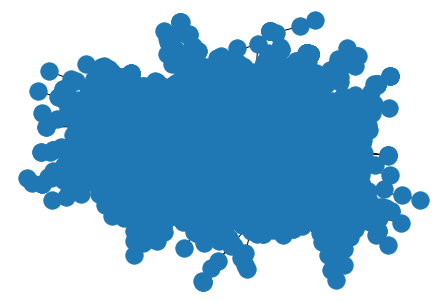

In [18]:
Gplot=nx.Graph()
for row in g.edges.select('src','dst').take(171002):
    Gplot.add_edge(row['src'],row['dst'])

nx.draw(Gplot)

## Menjalankan algoritma Girvan-Newman (Interupted)

In [19]:
from networkx.algorithms import community

communities_generator = community.girvan_newman(Gplot)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

KeyboardInterrupt: 

## Menjalankan algoritma Infomap

In [21]:
ig = Graph.TupleList(g.edges.collect(), directed=False)
infomap = ig.community_infomap()

In [22]:
print(infomap)

Clustering with 22470 elements and 1054 clusters
[   0] 0, 18427, 14266, 3897, 419, 17959, 633, 18447, 3179, 1365, 15356, 2257,
       4665, 6692, 8358, 16343, 11276, 18873, 12273, 12726, 4783, 4831, 22322,
       5742, 11763, 10635, 6821, 16486, 16687, 21808, 18165, 21437, 20150
[   1] 1, 21708, 22208, 22171, 6829, 16590, 20135, 8894, 15785, 10281, 7136,
       22405, 10379, 13737, 8533, 14344, 2812, 5755, 16260, 15026, 17370,
       17460, 8049, 5307, 4987, 12305, 19743, 21729, 5228, 9934, 1041, 13899,
       88, 7550, 11657, 13264, 8243, 19476, 840, 18971, 14181, 14272, 7535,
       12500, 1047, 14115, 19795, 16968, 16520, 8519, 14166, 21088, 94, 6409,
       6916, 18825, 16032, 17391, 10614, 14192, 13445, 123, 375, 130, 10617,
       19483, 14562, 14245, 343, 2496, 21663, 20844, 8540, 13719, 6189, 2822,
       19093, 17296, 17426, 14895, 4147, 10912, 11467, 18288, 9053, 2565,
       1617, 3797, 18721, 7066, 10926, 11043, 15468, 16574, 5843, 15481, 8381,
       11062, 1351, 14643, 7